<a href="https://colab.research.google.com/github/rapidmethodstomata/rapidmethodstomata/blob/main/Bounding_box_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Basic Packages**

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()  # checks
%cd ..


INFO:yolov5:YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CPU
YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.6/107.7 GB disk)
/content


**Check if OpenCV Works**

In [2]:
import cv2 

print(cv2.__version__)

4.6.0


**Import Required Modules**

In [3]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

**Function That Extract Bounding Box**

In [4]:
def ExtractBBox(img_path, bbox_path):


  #
  # Load Image, couvert to RGB space since opencv uses BGR as default format
  #
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  #
  # Load bounding boxes
  #
  label = np.loadtxt(bbox_path)
  label = np.reshape(label, [-1, 5])
  #
  # An image is a h x w x c tensor
  #
  h, w, _ = img.shape
  objects = []
  for bbox in label:
    bbox_center_w = int(bbox[1] * w)
    bbox_center_h = int(bbox[2] * h)
    bbox_w = int(bbox[3] * w)
    bbox_h = int(bbox[4] * h)

    #
    # Get the current patch of the img
    #
    cpatch = deepcopy(img[(bbox_center_h - bbox_h//2):(bbox_center_h + bbox_h//2),
                          (bbox_center_w - bbox_w//2):(bbox_center_w + bbox_w//2),
                          :])
    objects.append(cpatch)

  return objects

def save_img(img_path, img):
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  cv2.imwrite(img_path, img)

**Test of the above function**

In [6]:
from google.colab import drive
drive.mount('/content/gdrive') 
import os


Mounted at /content/gdrive


**Extract Patches from multiple images and save them in /content**





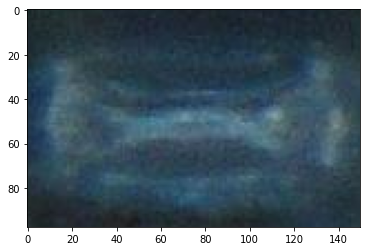

In [ ]:
ImgBasePath = '/content/gdrive/MyDrive/Rice/RiceAnalysedImages/'
TxtBasePath = '/content/gdrive/MyDrive/Rice/RiceAnalysedImages/'



for imgs in os.listdir('/content/gdrive/MyDrive/Rice/RiceAnalysedImages/'):
  # Change jpg to png or others if needed
  if imgs[-4:]!='.jpg':
    continue
  basename = os.path.basename(imgs)
  txtpath = os.path.join(TxtBasePath, basename[:-4] + '.txt')
  imgpath = os.path.join(ImgBasePath, imgs)
  patches = ExtractBBox(imgpath, txtpath)
  for idx, p in enumerate(patches):
    fname = basename[:-4] + '_{}.png'.format(idx)
    try:
      plt.imshow(p)
    except:
      continue
    save_img(fname, p)


In [ ]:
! tar -cjvf res.tar.bz2 /content/*.png

Streaming output truncated to the last 5000 lines.
/content/20211029171632_33.png
/content/20211029171632_3.png
/content/20211029171632_4.png
/content/20211029171632_5.png
/content/20211029171632_6.png
/content/20211029171632_7.png
/content/20211029171632_8.png
/content/20211029171632_9.png
/content/20211029171713_0.png
/content/20211029171713_10.png
/content/20211029171713_11.png
/content/20211029171713_12.png
/content/20211029171713_13.png
/content/20211029171713_14.png
/content/20211029171713_15.png
/content/20211029171713_16.png
/content/20211029171713_17.png
/content/20211029171713_18.png
/content/20211029171713_1.png
/content/20211029171713_2.png
/content/20211029171713_3.png
/content/20211029171713_4.png
/content/20211029171713_5.png
/content/20211029171713_6.png
/content/20211029171713_7.png
/content/20211029171713_8.png
/content/20211029171713_9.png
/content/20211029171905_0.png
/content/20211029171905_10.png
/content/20211029171905_11.png
/content/20211029171905_12.png
/conte

In [ ]:
%rm -rf /content/*.png